In [1]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
RANDOM_SEED: int = 1

In [3]:
df = pd.read_csv("email.csv")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df[["v1", "v2"]].rename(columns={"v1": "type", "v2": "text"})
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
vectorizer = TfidfVectorizer()
vectorizer.fit(df["text"])

xs = vectorizer.transform(df["text"])
ys = df["type"].map(lambda x: 0 if x == "ham" else 1)

In [6]:
xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, test_size=0.25, random_state=RANDOM_SEED)

# Experiments with Various Models

In the following, we will experiment with several models: k-Nearest Neighbors (KNN), Logistic Regression, Decision Tree, and Multilayer Perceptron (MLP).

## k-Nearest Neighbors

In [7]:
knn = KNeighborsClassifier()
knn.fit(xs_train, ys_train)
print(classification_report(ys_test, knn.predict(xs_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1213
           1       1.00      0.30      0.46       180

    accuracy                           0.91      1393
   macro avg       0.95      0.65      0.71      1393
weighted avg       0.92      0.91      0.89      1393



## Decision Tree

In [8]:
dt = DecisionTreeClassifier()
dt.fit(xs_train, ys_train)
print(classification_report(ys_test, dt.predict(xs_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1213
           1       0.86      0.88      0.87       180

    accuracy                           0.97      1393
   macro avg       0.92      0.93      0.93      1393
weighted avg       0.97      0.97      0.97      1393



## Logistic Regression

In [9]:
lr = LogisticRegression()
lr.fit(xs_train, ys_train)
print(classification_report(ys_test, lr.predict(xs_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1213
           1       0.99      0.78      0.87       180

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393



## Multilayer Perceptron (MLP)

In [10]:
mlp = MLPClassifier()
mlp.fit(xs_train, ys_train)
print(classification_report(ys_test, mlp.predict(xs_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1213
           1       0.99      0.91      0.95       180

    accuracy                           0.99      1393
   macro avg       0.99      0.95      0.97      1393
weighted avg       0.99      0.99      0.99      1393



### Confusion Matrix

Out of all models (with default parameters), MLP performed the best. We further visualize the performance using the confusion matrix.

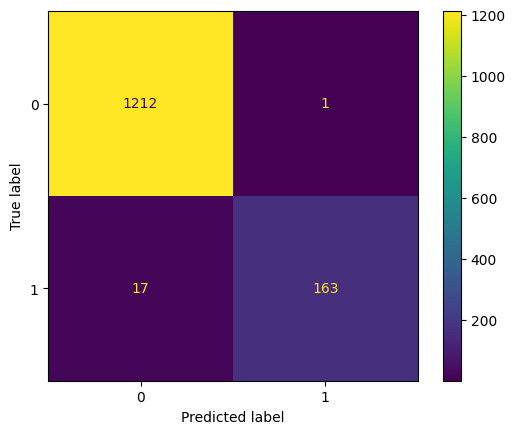

In [11]:
cm = confusion_matrix(ys_test, mlp.predict(xs_test), labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot();

In [12]:
def spam_detector(text: str) -> bool:
    """Returns `True` if spam, `False` otherwise."""

    features = vectorizer.transform([text])
    pred = mlp.predict(features)

    return bool(pred[0])

In [13]:
spam_detector("Reply with your bank credentials")

True

In [14]:
spam_detector("Greetings, I hope you are having a nice day")

False